In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maztl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
two_blobs=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_two_blobs.csv')

In [4]:
two_blobs_outlier=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_two_blobs_outliers.csv')

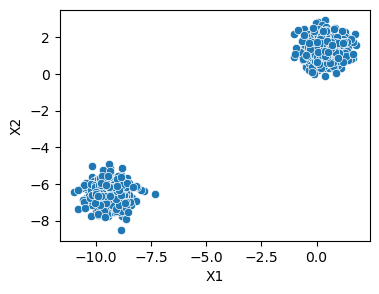

In [5]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=two_blobs,x='X1',y='X2')
plt.show()

In [28]:
def display(model,data):
    labels=model.fit_predict(data)
    plt.figure(figsize=(4,3))
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')
    plt.show()

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
modeldb=DBSCAN()

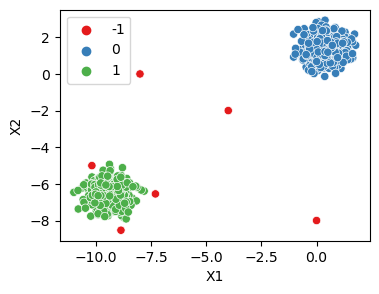

In [14]:
display(modeldb,two_blobs_outlier)

In [19]:
np.sum(modeldb.labels_ == -1)  # number of outliers

6

In [21]:
100 *np.sum(modeldb.labels_ == -1) / len(modeldb.labels_)  # percentage of outliers

0.5982053838484547

### Charting reasonable Epsilon values

In [6]:
from sklearn.cluster import DBSCAN

In [8]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,200):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outlier)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

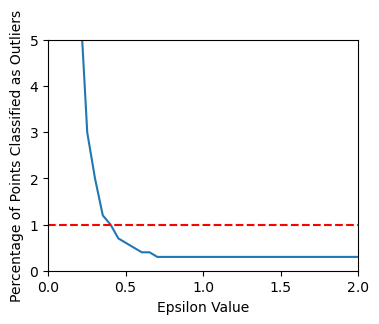

In [18]:
plt.figure(figsize=(4,3))
sns.lineplot(x=np.linspace(0.001,10,200),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')
plt.show()

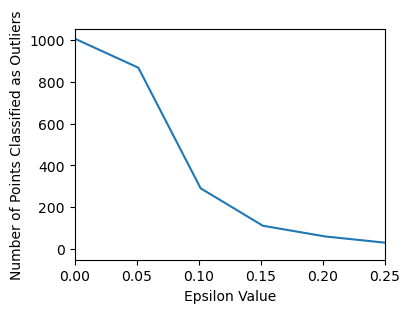

In [16]:
plt.figure(figsize=(4,3))
sns.lineplot(x=np.linspace(0.001,10,200),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,0.25)
plt.show()

In [20]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outlier)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

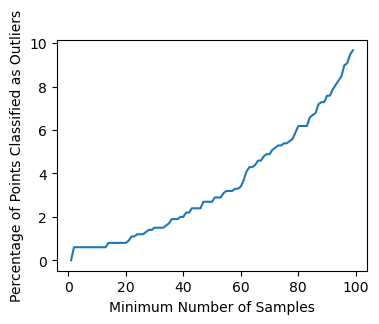

In [22]:
plt.figure(figsize=(4,3))
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")
plt.show()

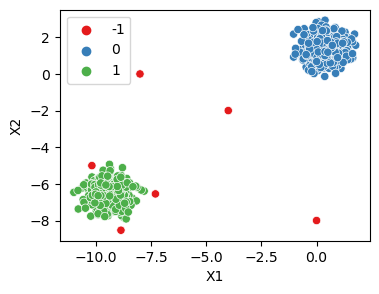

In [29]:
num_dim = two_blobs_outlier.shape[1]  # 建議設定一開始的min_samples值

dbscan = DBSCAN(min_samples=2*num_dim)
display(dbscan,two_blobs_outlier)

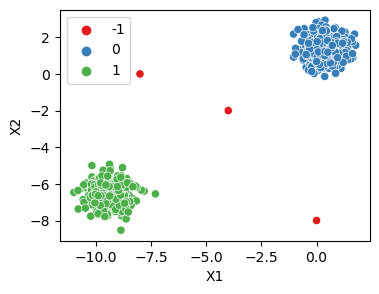

In [30]:
num_dim = two_blobs_outlier.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)  # 同時使用eps 和 min_samples
display(dbscan,two_blobs_outlier)

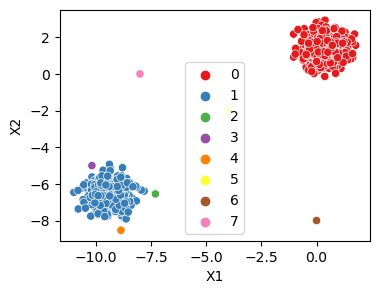

In [39]:
dbscan = DBSCAN(min_samples=1)
display(dbscan,two_blobs_outlier)

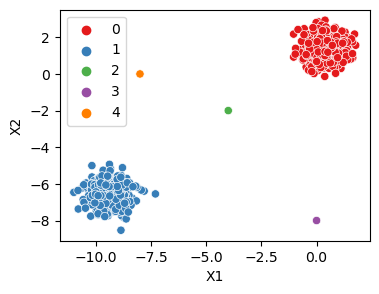

In [32]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display(dbscan,two_blobs_outlier)